In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_gen = ImageDataGenerator(rescale=1.0/255)

In [3]:
imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [4]:
Xbatch, Ybatch = train_generator.next()

In [5]:
X_val, Y_val = val_generator.next()

In [6]:
Xbatch.shape

(32, 64, 64, 3)

In [7]:
Ybatch[4]

1.0

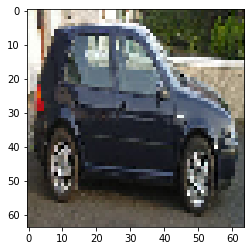

In [8]:
plt.imshow(Xbatch[4]);

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
import keras

In [10]:
#create model
def make_convnet(img_size, channel):
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size,img_size,channel))) # layer 1
    model.add(Conv2D(32, kernel_size=3, activation='relu')) # layer 2
    model.add(Dense(2, activation='softmax'))
    model.add(Flatten())

    ## Binary crossentropy loss function and Adam optimizer 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    return model

def train_model(model, epo):
    model.fit(Xbatch, Ybatch, validation_data=(X_val, Y_val), epochs=epo)
    return model

def model_info(model):
    return model.summary()

In [11]:
mm = make_convnet(img_size, 3)
trained_model = train_model(mm, 10)

Epoch 1/10
1/1 [==============================] - 1s 872ms/step - loss: 0.6960 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 341ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.6934 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 321ms/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6936 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 325ms/step - loss: 0.6936 - accuracy: 0.0000e+00 - val_loss: 0.6935 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 320ms/step - loss: 0.6935 - accuracy: 0.0000e+00 - val_loss: 0.6934 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 316ms/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 333ms/step - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss

In [ ]:
model_summary = model_info(trained_model)

In [ ]:
"""model = Sequential()

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size,img_size,channel))) # layer 1
    model.add(Conv2D(256, kernel_size=3, activation='relu')) # layer 2
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, kernel_size=3, activation='softmax')) # layer 3
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(256, kernel_size=3, activation='relu')) # layer 4
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(256, kernel_size=3, activation='sigmoid')) # layer 5
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    # Input + Output Layer
    model.add(Dense(10, activation='relu'))
    """model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=batch_size,activation='softmax'))"""
    
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    return model"""

In [12]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 20s 0us/step
